In [2]:
import pandas as pd
df = pd.read_csv('../NY_fare.csv')
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [3]:
df.count().isnull()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

### Remove fare_amount < 0

In [4]:
negative_fare=df[df['fare_amount']<0]
df=df.drop(negative_fare.index)
df['fare_amount'].describe()


count    49994.000000
mean        11.365903
std          9.684843
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: fare_amount, dtype: float64

### Remove passenger_count <=0

In [5]:
zero_passenger= df[df['passenger_count']<=0]
df= df.drop(zero_passenger.index)
df['passenger_count'].describe()

count    49829.000000
mean         1.673383
std          1.287762
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

### Remove 'key' column

In [6]:
df = df.drop(['key'],axis=1)

In [7]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
import numpy as np

def great_circle_distance(pick_long, pick_lat, drop_long, drop_lat):
    # Radius of earth (m)
    R = 6371000
    
    # Convert decimal degrees to radians
    pick_long, pick_lat, drop_long, drop_lat = map(np.radians, [pick_long, pick_lat, drop_long, drop_lat])
    
    # Distance of longitude and latitude in radians
    dist_long = drop_long - pick_long
    dist_lat = drop_lat - pick_lat
    
    # Haversine implementation
    a = np.sin(dist_lat/2)**2 + np.cos(pick_lat) * np.cos(drop_lat) * np.sin(dist_long/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dist_m = R*c # Distance in meters
    dist_km = dist_m / 1000 # Distance in km
    return dist_km

# new column: great_circle_distance
df['great_circle_distance'] = great_circle_distance(
        df['pickup_longitude'], 
        df['pickup_latitude'], 
        df['dropoff_longitude'],
        df['dropoff_latitude']
    )

### Remove distance == 0

In [9]:
# df['great_circle_distance'].sort_values(ascending=True)
distance_0=df[df['great_circle_distance']<=0]
df = df.drop(distance_0.index)

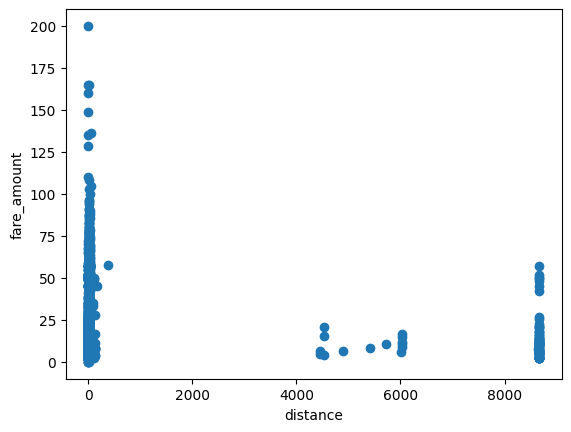

In [29]:
import matplotlib.pyplot as plt

plt.scatter(x=df['great_circle_distance'], y=df['fare_amount'])
plt.xlabel('distance')
plt.ylabel('fare_amount')
plt.show()

### Drop row of distance > 1000

In [34]:
big_distance = df[df['great_circle_distance']>1000]
df = df.drop(big_distance.index)

count    48295.000000
mean         3.431410
std          4.678690
min          0.000084
25%          1.288133
50%          2.187054
75%          3.976340
max        376.445536
Name: great_circle_distance, dtype: float64